In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Model Comparisons
This report will show the model performance for the experimental models and the final production model.

In [2]:
__author__ = "John Hoff"
__email__ = "john.hoff@braindonor.net"
__copyright__ = "Copyright 2019, John Hoff"
__license__ = "Creative Commons Attribution-ShareAlike 4.0 International License"
__version__ = "1.0.0"

import os
if os.getcwd().endswith('notebooks'):
    os.chdir('..')
    
from IPython.display import display, Markdown

import itertools
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.metrics import auc, accuracy_score, classification_report, confusion_matrix, log_loss, roc_curve

In [3]:
def custom_classification_report(title, predict_file, predict_proba_file):
    """
    Display a classification report for the performance of the predicted values.
    :param title: Title to display for the report.
    :param predict_file: File Containing Class Predictions
    :param predict_proba_file: File Containing Class Prediction Probabilities
    :return: 
    """
    display(Markdown('## %s' % title))
    with open(predict_file, 'rb') as file:
        frame = pickle.load(file)
        y_test = frame.y_actual
        y_test_predict = frame.y_predict
        display(Markdown('#### Confusion Matrix'))
        matrix = confusion_matrix(y_test, y_test_predict)

        plt.figure(figsize=(12,12))
        plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

        color_mid = matrix.max() / 2.
        for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
            plt.text(j, i, matrix[i, j], fontsize=10,
                     horizontalalignment="center",
                     verticalalignment='center',
                     color="white" if matrix[i, j] > color_mid else "black")

        ticks = np.arange(len(np.unique(y_test)))
        classes = np.unique(y_test)
        plt.xticks(ticks, classes)
        plt.yticks(ticks, classes)
        plt.ylabel('True Class', fontsize=20, rotation=90)
        plt.xlabel('Predicted Class', fontsize=20)
        plt.show()

        display(Markdown('#### scikit-learn classification_report'))
        print(classification_report(y_test, y_test_predict))
        
        display(Markdown('#### Accuracy Score'))
        print('%f' % accuracy_score(y_test, y_test_predict))
        
    with open(predict_proba_file, 'rb') as file:
        frame = pickle.load(file)
        display(Markdown('#### Log Loss Score'))
        print('%f' % log_loss(frame.y_actual, frame.y_predict))
        
        display(Markdown('#### ROC Curves for All Classes'))
        plt.figure(figsize=(10,10))
        for class_number in np.unique(frame.y_actual):
            y_converted = []
            for y in frame.y_actual:
                if y == class_number:
                    y_converted.append(1)
                else:
                    y_converted.append(0)
            fpr, tpr, threshold = roc_curve(y_converted, frame.y_predict[:,1])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label='%0.3f AUC - Class %s' % (roc_auc, int(class_number)))
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'k--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

# Experimental Model Performance

## Bernoulli Naive Bayes

#### Confusion Matrix

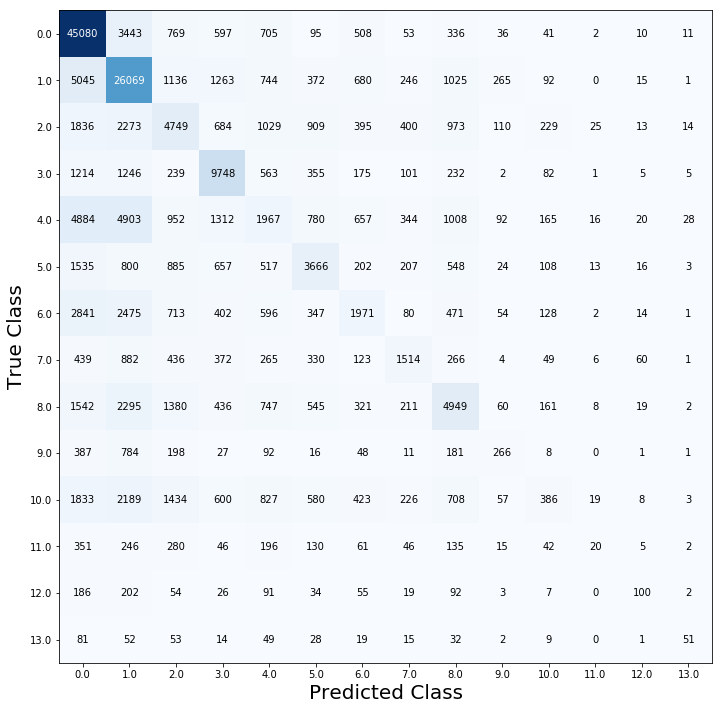

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.67      0.87      0.76     51686
         1.0       0.54      0.71      0.61     36953
         2.0       0.36      0.35      0.35     13639
         3.0       0.60      0.70      0.65     13968
         4.0       0.23      0.11      0.15     17128
         5.0       0.45      0.40      0.42      9181
         6.0       0.35      0.20      0.25     10095
         7.0       0.44      0.32      0.37      4747
         8.0       0.45      0.39      0.42     12676
         9.0       0.27      0.13      0.18      2020
        10.0       0.26      0.04      0.07      9293
        11.0       0.18      0.01      0.02      1575
        12.0       0.35      0.11      0.17       871
        13.0       0.41      0.13      0.19       406

   micro avg       0.55      0.55      0.55    184238
   macro avg       0.40      0.32      0.33    184238
weighted avg       0.49      0.55      0.51    184238



#### Accuracy Score

0.545685


#### Log Loss Score

1.471855


#### ROC Curves for All Classes

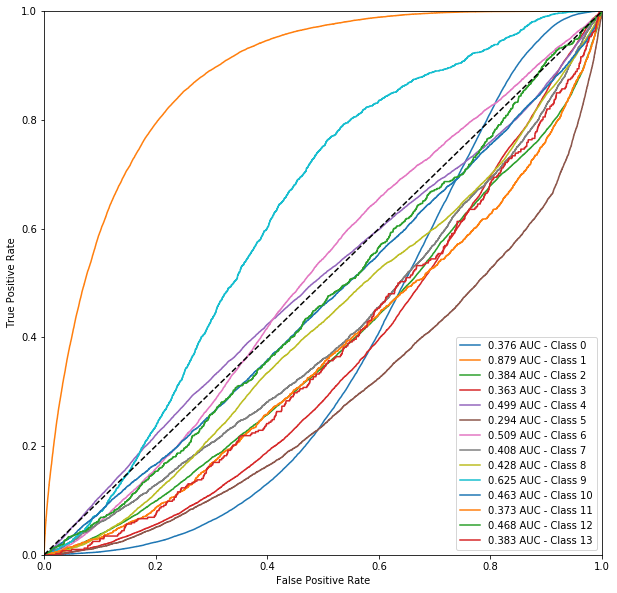

In [16]:
custom_classification_report(
    'Bernoulli Naive Bayes',
    'model/experiment/output/bernoulli_naive_bayes_basic_predict.p',
    'model/experiment/output/bernoulli_naive_bayes_basic_predict_proba.p'
)

## Complement Naive Bayes

#### Confusion Matrix

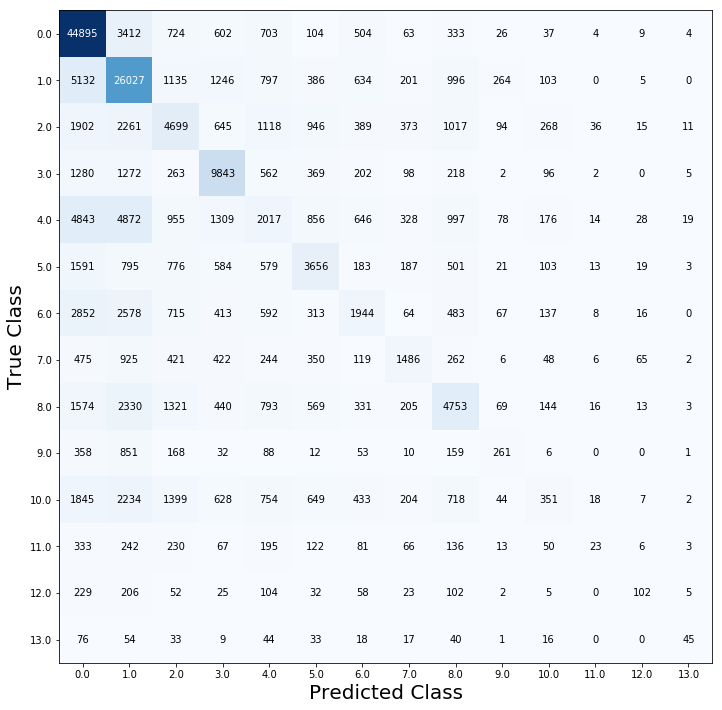

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.67      0.87      0.76     51420
         1.0       0.54      0.70      0.61     36926
         2.0       0.36      0.34      0.35     13774
         3.0       0.61      0.69      0.65     14212
         4.0       0.23      0.12      0.16     17138
         5.0       0.44      0.41      0.42      9011
         6.0       0.35      0.19      0.25     10182
         7.0       0.45      0.31      0.36      4831
         8.0       0.44      0.38      0.41     12561
         9.0       0.28      0.13      0.18      1999
        10.0       0.23      0.04      0.06      9286
        11.0       0.16      0.01      0.03      1567
        12.0       0.36      0.11      0.17       945
        13.0       0.44      0.12      0.18       386

   micro avg       0.54      0.54      0.54    184238
   macro avg       0.40      0.32      0.33    184238
weighted avg       0.49      0.54      0.50    184238



#### Accuracy Score

0.543330


#### Log Loss Score

1.476054


#### ROC Curves for All Classes

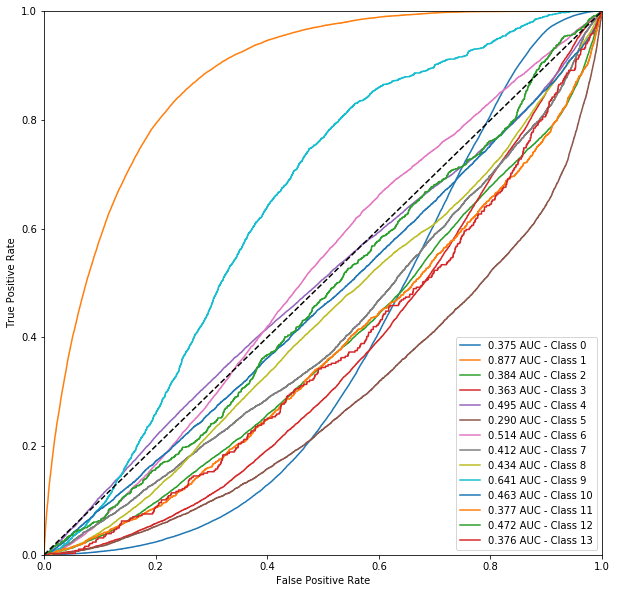

In [17]:
custom_classification_report(
    'Complement Naive Bayes',
    'model/experiment/output/complement_naive_bayes_basic_predict.p',
    'model/experiment/output/complement_naive_bayes_basic_predict_proba.p'
)

## Decision Tree

#### Confusion Matrix

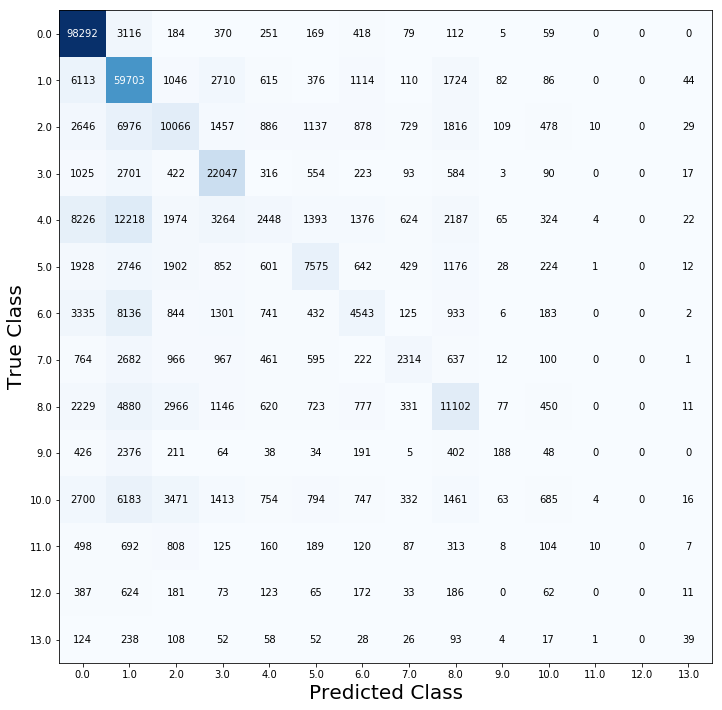

#### scikit-learn classification_report

c:\repos\depaul\la-parking-tickets\venv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85    103055
         1.0       0.53      0.81      0.64     73723
         2.0       0.40      0.37      0.38     27217
         3.0       0.62      0.79      0.69     28075
         4.0       0.30      0.07      0.12     34125
         5.0       0.54      0.42      0.47     18116
         6.0       0.40      0.22      0.28     20581
         7.0       0.44      0.24      0.31      9721
         8.0       0.49      0.44      0.46     25312
         9.0       0.29      0.05      0.08      3983
        10.0       0.24      0.04      0.06     18623
        11.0       0.33      0.00      0.01      3121
        12.0       0.00      0.00      0.00      1917
        13.0       0.18      0.05      0.07       840

   micro avg       0.59      0.59      0.59    368409
   macro avg       0.39      0.32      0.32    368409
weighted avg       0.54      0.59      0.54    368409



#### Accuracy Score

0.594481


#### Log Loss Score

1.364006


#### ROC Curves for All Classes

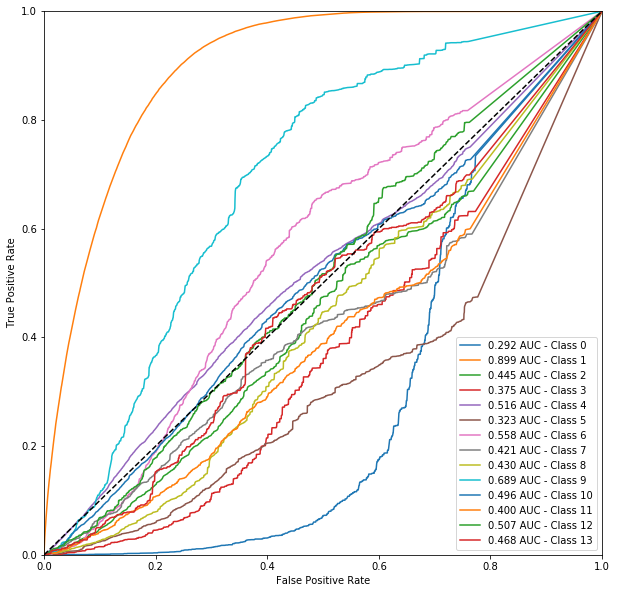

In [6]:
custom_classification_report(
    'Decision Tree',
    'model/experiment/output/decision_tree_basic_predict.p',
    'model/experiment/output/decision_tree_basic_predict_proba.p'
)

## Extra Trees

#### Confusion Matrix

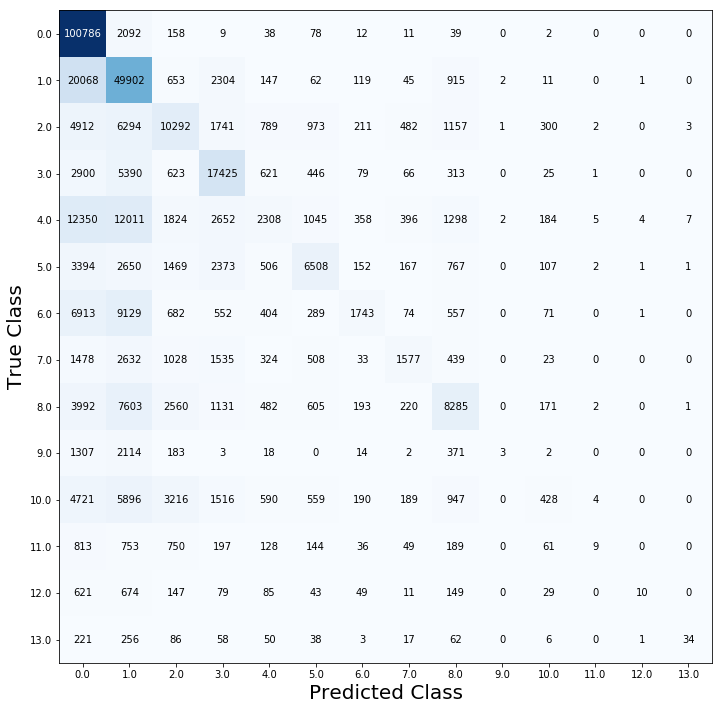

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.61      0.98      0.75    103225
         1.0       0.46      0.67      0.55     74229
         2.0       0.43      0.38      0.40     27157
         3.0       0.55      0.62      0.59     27889
         4.0       0.36      0.07      0.11     34444
         5.0       0.58      0.36      0.44     18097
         6.0       0.55      0.09      0.15     20415
         7.0       0.48      0.16      0.24      9577
         8.0       0.53      0.33      0.41     25245
         9.0       0.38      0.00      0.00      4017
        10.0       0.30      0.02      0.04     18256
        11.0       0.36      0.00      0.01      3129
        12.0       0.56      0.01      0.01      1897
        13.0       0.74      0.04      0.08       832

   micro avg       0.54      0.54      0.54    368409
   macro avg       0.49      0.27      0.27    368409
weighted avg       0.51      0.54      0.47    368409



#### Accuracy Score

0.541002


#### Log Loss Score

1.496213


#### ROC Curves for All Classes

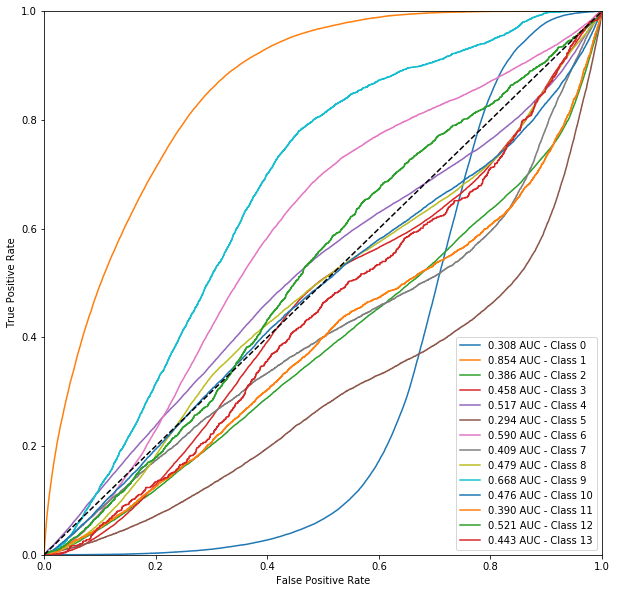

In [7]:
custom_classification_report(
    'Extra Trees',
    'model/experiment/output/extra_trees_basic_predict.p',
    'model/experiment/output/extra_trees_basic_predict_proba.p'
)

## Gradient Boosting

#### Confusion Matrix

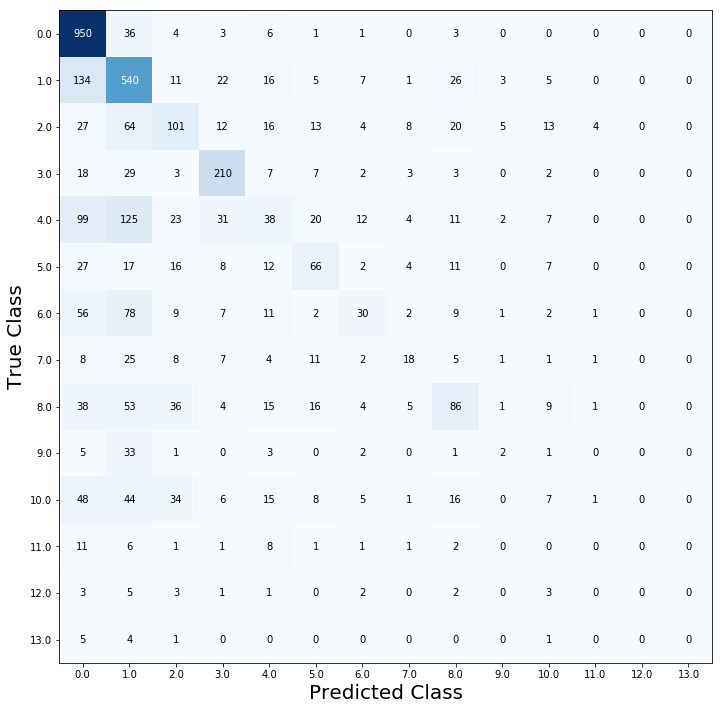

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.66      0.95      0.78      1004
         1.0       0.51      0.70      0.59       770
         2.0       0.40      0.35      0.38       287
         3.0       0.67      0.74      0.70       284
         4.0       0.25      0.10      0.15       372
         5.0       0.44      0.39      0.41       170
         6.0       0.41      0.14      0.21       208
         7.0       0.38      0.20      0.26        91
         8.0       0.44      0.32      0.37       268
         9.0       0.13      0.04      0.06        48
        10.0       0.12      0.04      0.06       185
        11.0       0.00      0.00      0.00        32
        12.0       0.00      0.00      0.00        20
        13.0       0.00      0.00      0.00        11

   micro avg       0.55      0.55      0.55      3750
   macro avg       0.32      0.28      0.28      3750
weighted avg       0.48      0.55      0.49      3750



c:\repos\depaul\la-parking-tickets\venv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Accuracy Score

0.546133


#### Log Loss Score

1.487148


#### ROC Curves for All Classes

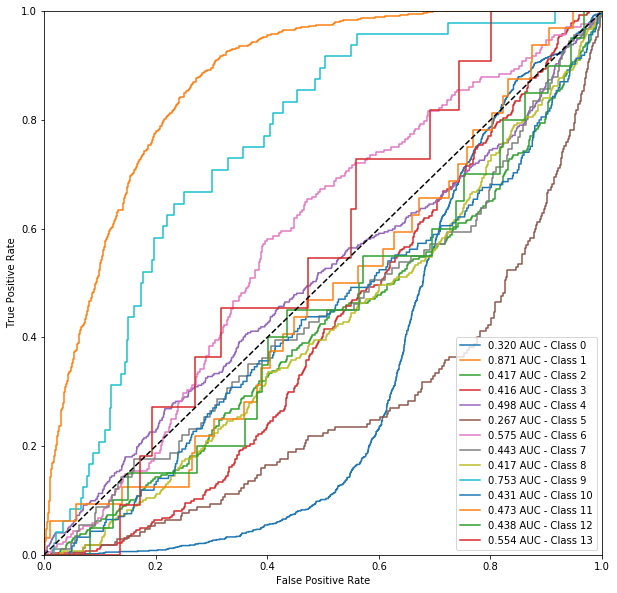

In [9]:
custom_classification_report(
    'Gradient Boosting',
    'model/experiment/output/gradient_boosting_basic_predict.p',
    'model/experiment/output/gradient_boosting_basic_predict_proba.p'
)

## LightGBM

#### Confusion Matrix

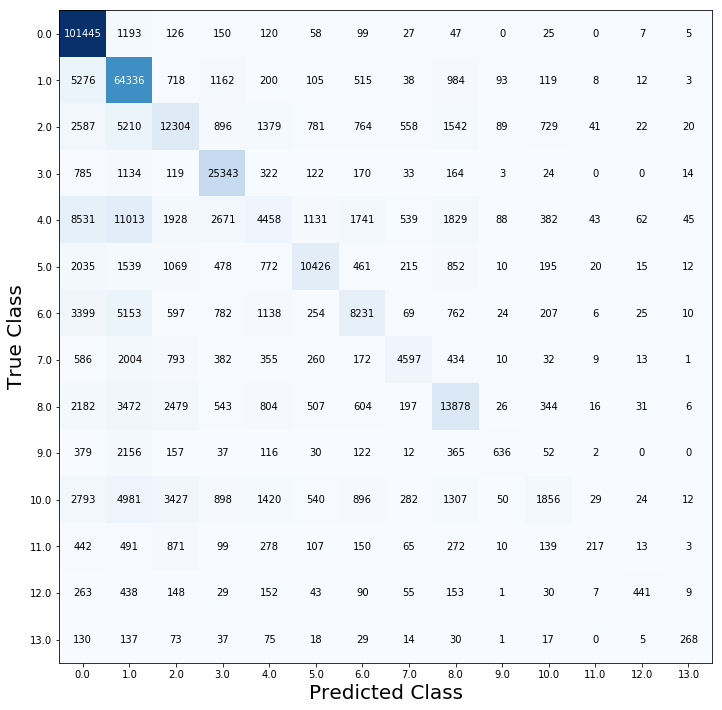

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87    103302
         1.0       0.62      0.87      0.73     73569
         2.0       0.50      0.46      0.48     26922
         3.0       0.76      0.90      0.82     28233
         4.0       0.38      0.13      0.19     34461
         5.0       0.72      0.58      0.64     18099
         6.0       0.59      0.40      0.47     20657
         7.0       0.69      0.48      0.56      9648
         8.0       0.61      0.55      0.58     25089
         9.0       0.61      0.16      0.25      4064
        10.0       0.45      0.10      0.16     18515
        11.0       0.55      0.07      0.12      3157
        12.0       0.66      0.24      0.35      1859
        13.0       0.66      0.32      0.43       834

   micro avg       0.67      0.67      0.67    368409
   macro avg       0.61      0.44      0.48    368409
weighted avg       0.64      0.67      0.63    368409



#### Accuracy Score

0.674348


#### Log Loss Score

1.082473


#### ROC Curves for All Classes

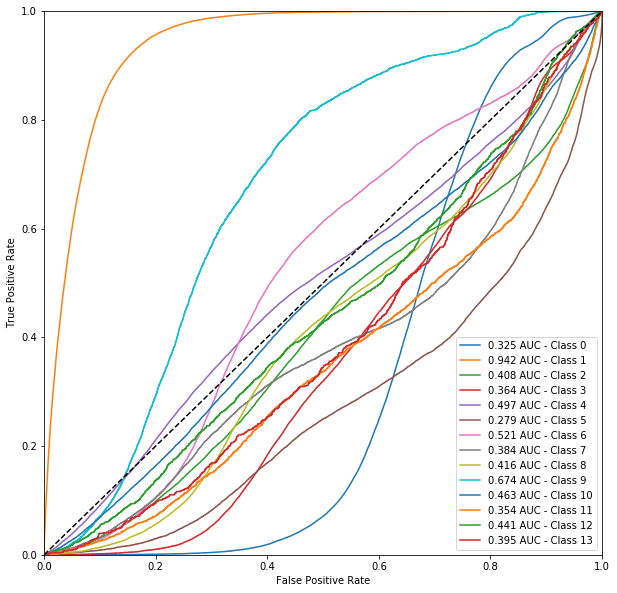

In [10]:
custom_classification_report(
    'LightGBM',
    'model/experiment/output/lightgbm_basic_predict.p',
    'model/experiment/output/lightgbm_basic_predict_proba.p'
)

## Nueral Network

#### Confusion Matrix

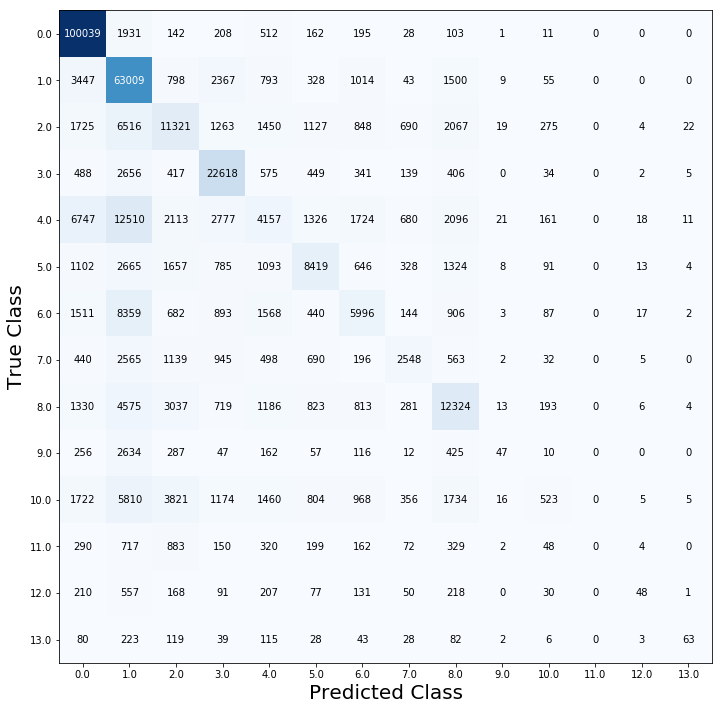

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90    103332
         1.0       0.55      0.86      0.67     73363
         2.0       0.43      0.41      0.42     27327
         3.0       0.66      0.80      0.73     28130
         4.0       0.29      0.12      0.17     34341
         5.0       0.56      0.46      0.51     18135
         6.0       0.45      0.29      0.35     20608
         7.0       0.47      0.26      0.34      9623
         8.0       0.51      0.49      0.50     25304
         9.0       0.33      0.01      0.02      4053
        10.0       0.34      0.03      0.05     18398
        11.0       0.00      0.00      0.00      3176
        12.0       0.38      0.03      0.05      1788
        13.0       0.54      0.08      0.13       831

   micro avg       0.63      0.63      0.63    368409
   macro avg       0.45      0.34      0.35    368409
weighted avg       0.58      0.63      0.58    368409



#### Accuracy Score

0.627325


#### Log Loss Score

1.232498


#### ROC Curves for All Classes

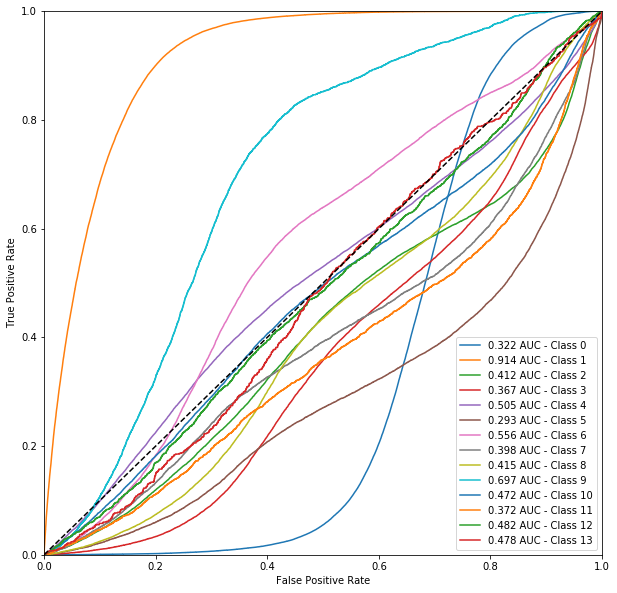

In [12]:
custom_classification_report(
    'Nueral Network',
    'model/experiment/output/neural_network_basic_predict.p',
    'model/experiment/output/neural_network_basic_predict_proba.p'
)

## XGBoost

#### Confusion Matrix

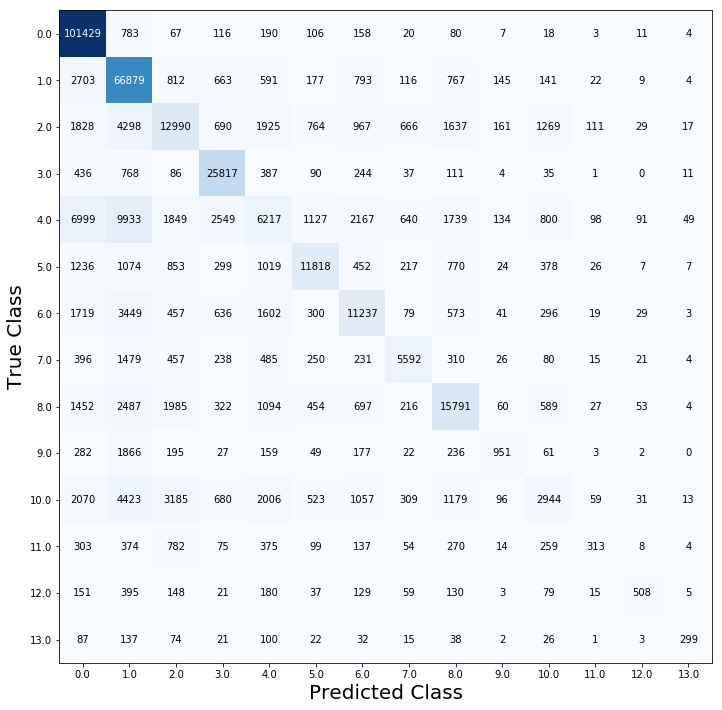

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91    102992
         1.0       0.68      0.91      0.78     73822
         2.0       0.54      0.47      0.51     27352
         3.0       0.80      0.92      0.86     28027
         4.0       0.38      0.18      0.25     34392
         5.0       0.75      0.65      0.70     18180
         6.0       0.61      0.55      0.58     20440
         7.0       0.70      0.58      0.63      9584
         8.0       0.67      0.63      0.65     25231
         9.0       0.57      0.24      0.33      4030
        10.0       0.42      0.16      0.23     18575
        11.0       0.44      0.10      0.17      3067
        12.0       0.63      0.27      0.38      1860
        13.0       0.71      0.35      0.47       857

   micro avg       0.71      0.71      0.71    368409
   macro avg       0.62      0.50      0.53    368409
weighted avg       0.68      0.71      0.68    368409



#### Accuracy Score

0.713297


#### Log Loss Score

0.946272


#### ROC Curves for All Classes

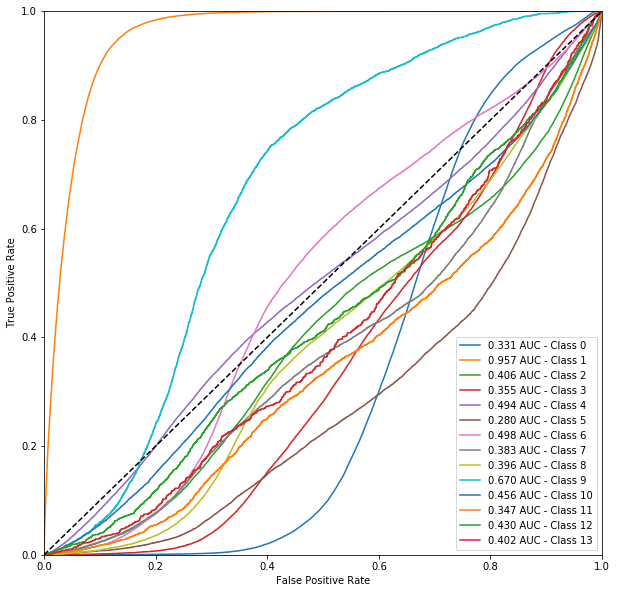

In [13]:
custom_classification_report(
    'XGBoost',
    'model/experiment/output/xgboost_basic_predict.p',
    'model/experiment/output/xgboost_basic_predict_proba.p'
)

## XGBoost

#### Confusion Matrix

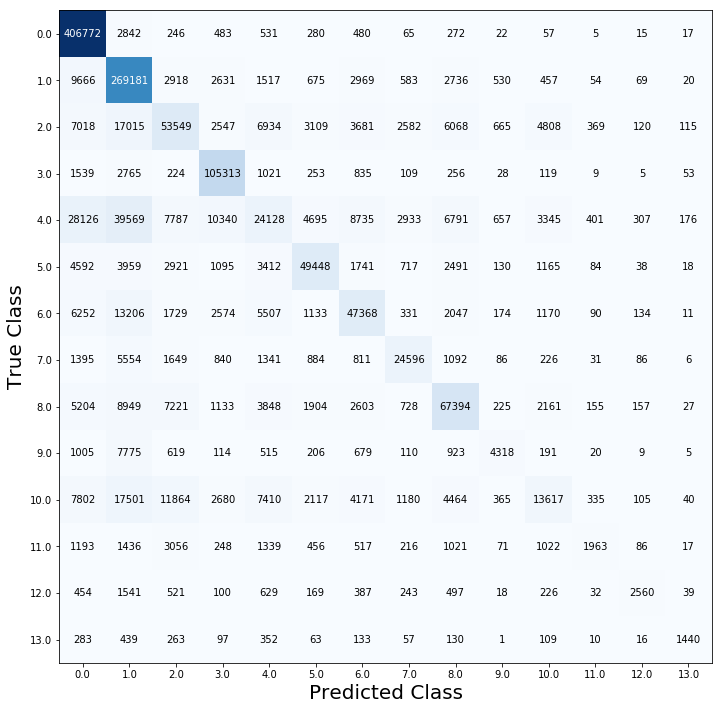

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91    412087
         1.0       0.69      0.92      0.79    294006
         2.0       0.57      0.49      0.53    108580
         3.0       0.81      0.94      0.87    112529
         4.0       0.41      0.17      0.25    137990
         5.0       0.76      0.69      0.72     71811
         6.0       0.63      0.58      0.60     81726
         7.0       0.71      0.64      0.67     38597
         8.0       0.70      0.66      0.68    101709
         9.0       0.59      0.26      0.36     16489
        10.0       0.47      0.18      0.27     73651
        11.0       0.55      0.16      0.24     12641
        12.0       0.69      0.35      0.46      7416
        13.0       0.73      0.42      0.54      3393

   micro avg       0.73      0.73      0.73   1472625
   macro avg       0.65      0.53      0.56   1472625
weighted avg       0.70      0.73      0.70   1472625



#### Accuracy Score

0.727712


#### Log Loss Score

0.899270


#### ROC Curves for All Classes

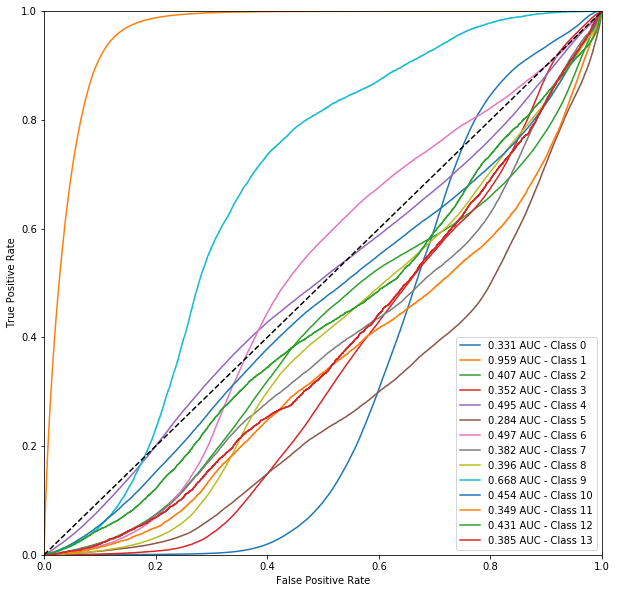

In [15]:
custom_classification_report(
    'XGBoost',
    'model/output/xgboost_model_predict.p',
    'model/output/xgboost_model_predict_proba.p'
)